## Anomaly Detection using machine learning

### Import the Libtrarys

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

### Import Trainset

In [22]:
train_data=pd.read_csv("C:\\Users\\suvam\\Downloads\\train.csv")
train_data.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


### Find the null value

In [24]:
train_data.isnull().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

### Import Testset

In [25]:
test_data=pd.read_csv("C:\\Users\\suvam\Downloads\\test.csv")
test_data.head()

,timestamp,value,predicted
0,1396332000,20.0,20.0
1,1396332300,20.0,20.0
2,1396332600,20.0,20.0
3,1396332900,20.0,20.0
4,1396333200,20.0,20.0


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  3960 non-null   int64  
 1   value      3960 non-null   float64
 2   predicted  3960 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 92.9 KB


### Find null value

In [27]:
test_data.isnull().sum()

timestamp    0
value        0
predicted    0
dtype: int64

In [28]:
train_data['is_anomaly'].value_counts()

is_anomaly
False    15054
True       776
Name: count, dtype: int64

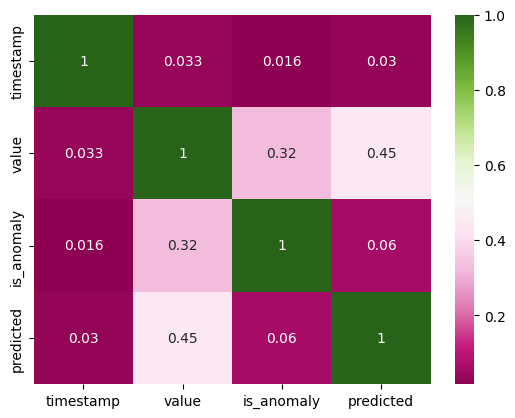

In [29]:
sns.heatmap(train_data.corr(),annot=True,cmap='PiYG')
plt.show()

### Plot the Veriables

<Axes: xlabel='value', ylabel='predicted'>

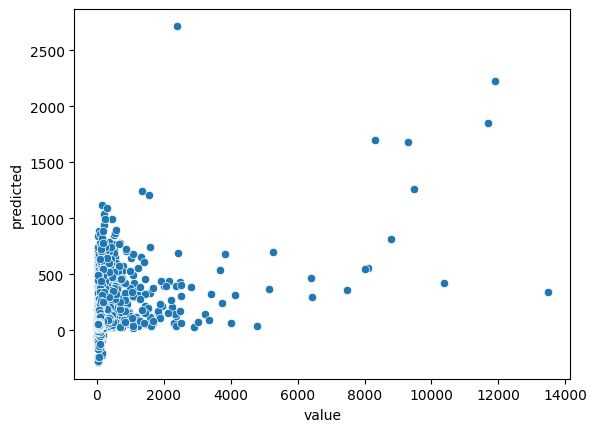

In [30]:
sns.scatterplot(x=train_data['value'], y=train_data['predicted'])

<Axes: xlabel='timestamp', ylabel='predicted'>

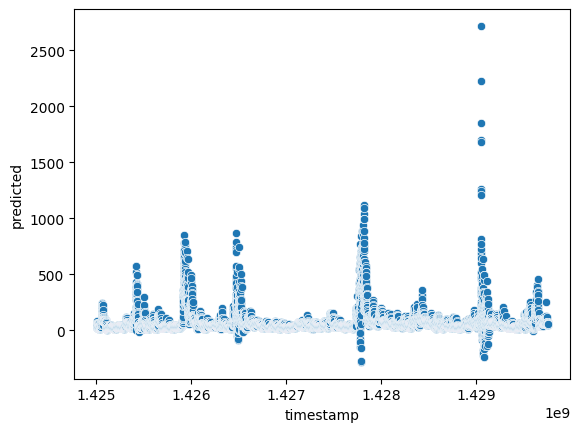

In [31]:
sns.scatterplot(x=train_data['timestamp'], y=train_data['predicted'])

In [32]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler() 
train_data[['value', 'predicted']]=scaler.fit_transform(train_data[['value', 'predicted']])
test_data[['value', 'predicted']]=scaler.fit_transform(test_data[['value', 'predicted']])

In [33]:
train_data['is_anomaly']=train_data['is_anomaly'].replace(True,1).replace(False,0)

In [34]:
train_data.is_anomaly

0        0
1        0
2        0
3        0
4        0
        ..
15825    0
15826    0
15827    0
15828    0
15829    0
Name: is_anomaly, Length: 15830, dtype: int64

In [35]:
X=train_data.drop('is_anomaly',axis=1) 
y=train_data['is_anomaly']

### Train the Model

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Fit the Model

In [37]:
RF=RandomForestClassifier(random_state=42) 
RF.fit(X_train,y_train) 
y_pred=RF.predict(X_test) 
acc=accuracy_score(y_test,y_pred) 
rep=classification_report(y_test,y_pred) 

### Accuracy of the Model

In [38]:
print(f'Accuracy:{acc}') 
print('Classification Report:') 
print(rep)

Accuracy:0.9712571067593178
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2997
           1       0.82      0.59      0.69       169

    accuracy                           0.97      3166
   macro avg       0.90      0.79      0.84      3166
weighted avg       0.97      0.97      0.97      3166

